In [7]:
import pandas as pd

df = pd.read_csv('MP_queried_data_featurized.csv')

df = df.dropna(subset=['formula_pretty'])

# Calculate the mean and standard deviation of the formation energy
formation_energy_mean = df['formation_energy_per_atom'].mean()
formation_energy_std = df['formation_energy_per_atom'].std()

# Define the upper and lower bounds
lower_bound = formation_energy_mean - 7 * formation_energy_std
upper_bound = formation_energy_mean + 7 * formation_energy_std

# Remove samples with formation energy outside of ±7σ 
train_data_filtered = df[(df['formation_energy_per_atom'] >= lower_bound) & (df['formation_energy_per_atom'] <= upper_bound)]

train_data_filtered.reset_index(drop=True, inplace=True)

In [11]:
train_data_filtered

,formula_pretty,number,formation_energy_per_atom,composition,H,He,Li,Be,B,C,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,LuH6(ClO5)3,2,-1.098822,Lu1 H6 Cl3 O15,0.240000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
1,Y2MgSe4,122,-1.868095,Y2 Mg1 Se4,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
2,Ba(AlSi)2,139,-0.263387,Ba1 Al2 Si2,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
3,MgH12(BrO3)2,12,-1.382796,Mg1 H12 Br2 O6,0.571429,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
4,Cs3Nd(MoO4)3,62,-2.414818,Cs3 Nd1 Mo3 O12,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153224,AlVF5,71,-3.481125,Al1 V1 F5,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
153225,Y13Sn31Pd40,191,-0.757339,Y13 Sn31 Pd40,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
153226,U(HO2)2,14,-2.487691,U1 H2 O4,0.285714,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
153227,C11N4,111,0.311359,C11 N4,0.000000,0.0,0.0,0.0,0.0,0.733333,...,0.0,0,0,0,0,0,0,0,0,0


In [8]:
X = train_data_filtered[['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 
                      'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 
                      'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
                      'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
                      'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
                      'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
                      'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
                      'Es', 'Fm', 'Md', 'No', 'Lr']].values
y = train_data_filtered['formation_energy_per_atom'].values

/home/jing/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Using device: cpu
Epoch [1/500], Train Loss: 0.2828, Test Loss: 0.2229
Epoch [2/500], Train Loss: 0.2068, Test Loss: 0.1894
Epoch [3/500], Train Loss: 0.1876, Test Loss: 0.1754
Epoch [4/500], Train Loss: 0.1795, Test Loss: 0.1707
Epoch [5/500], Train Loss: 0.1733, Test Loss: 0.1759
Epoch [6/500], Train Loss: 0.1674, Test Loss: 0.1632
Epoch [7/500], Train Loss: 0.1647, Test Loss: 0.1607
Epoch [8/500], Train Loss: 0.1611, Test Loss: 0.1700
Epoch [9/500], Train Loss: 0.1582, Test Loss: 0.1569
Epoch [10/500], Train Loss: 0.1565, Test Loss: 0.1539
Epoch [11/500], Train Loss: 0.1566, Test Loss: 0.1537
Epoch [12/500], Train Loss: 0.1538, Test Loss: 0.1525
Epoch [13/500], Train Loss: 0.1521, Test Loss: 0.1522
Epoch [14/500], Train Loss: 0.1519, Test Loss: 0.1611
Epoch [15/500], Train Loss: 0.1503, Test Loss: 0.1551
Epoch [16/500], Train Loss: 0.1492, Test Loss: 0.1545
Epoch [17/500], Train Loss: 0.1484, Test Loss: 0.1542
Epoch [18/500], Train Loss: 0.1478, Test Loss: 0.1541
Epoch [19/500], Tra

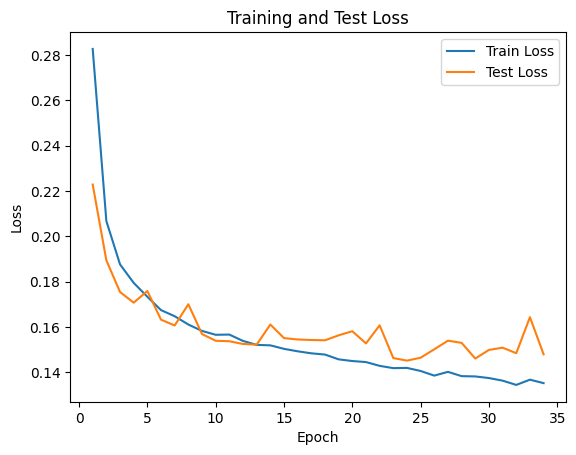

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Device initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Define model parameters
input_size = X_train.shape[1]
output_size = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Create an instance of the model and move it to device
model = NeuralNetwork(input_size, output_size).to(device)

# Define the loss function and optimizer
criterion = nn.L1Loss()  # Mean Absolute Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Train the model with early stopping
num_epochs = 500
patience = 10  # Number of epochs to wait for improvement
best_test_loss = float('inf')
counter = 0  # Counter for patience

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # Calculate average train loss
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item() * inputs.size(0)

    # Calculate average test loss
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    # Check for early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    # Print progress for every epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 0.1479
Mean Squared Error (MSE): 0.1697
Root Mean Squared Error (RMSE): 0.4120
R-squared (R2): 0.8818


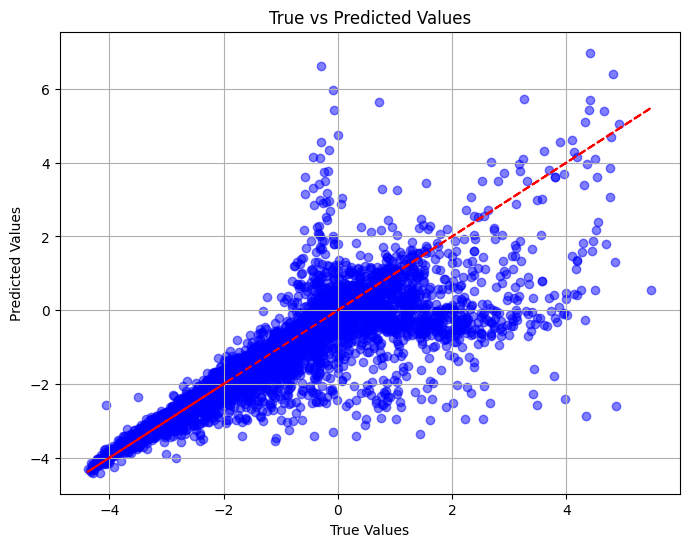

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
mse = mean_squared_error(y_test.cpu().numpy(), y_pred)
rmse = mean_squared_error(y_test.cpu().numpy(), y_pred, squared=False)
r2 = r2_score(y_test.cpu().numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

X_test = X_test.to(device)

# Get predictions for the test set
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()

# Convert tensors back to NumPy arrays
y_true = y_test.cpu().numpy()

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot(y_true, y_true, color='red', linestyle='--')  # Plot y = x line for reference
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.savefig('true_vs_predicted_values.pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Mean Absolute Error (MAE): 0.1479
Mean Squared Error (MSE): 0.1697
Root Mean Squared Error (RMSE): 0.4120
R-squared (R²): 0.8818


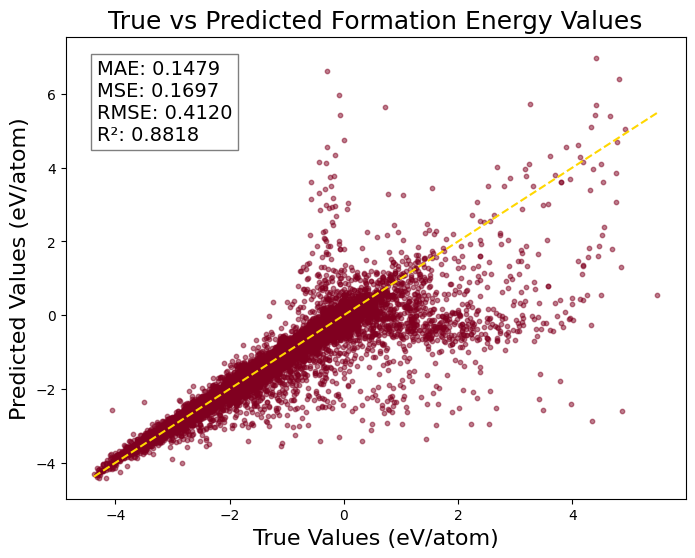

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import torch

# Ensure the model is in evaluation mode
model.eval()  # Set model to evaluation mode

# Move the test data to the appropriate device
X_test = X_test.to(device)

# Get predictions for the test set
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()  # Predictions as numpy array

# Convert the true labels (y_test) to numpy array
y_true = y_test.cpu().numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

# Plot true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='#800020', alpha=0.5, s=10)  # Burgundy dots
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='#FFD700', linestyle='--')  # y = x line in gold

# Set title and labels with specified font sizes
plt.title('True vs Predicted Formation Energy Values', fontsize=18)
plt.xlabel('True Values (eV/atom)', fontsize=16)
plt.ylabel('Predicted Values (eV/atom)', fontsize=16)

# Create a box for metrics in the upper-left corner
metrics_text = f'MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}'
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Save the plot in EPS format
plt.savefig("cf_dups.eps", format='eps')

# Display the plot
plt.show()


In [20]:
import pandas as pd

# Ensure that y_true and y_pred are 1-dimensional
y_true = y_true.ravel()  # or y_true.squeeze()
y_pred = y_pred.ravel()  # or y_pred.squeeze()

# Convert true and predicted values into a pandas DataFrame
df_results = pd.DataFrame({
    'True Values SG': y_true,
    'Predicted Values SG': y_pred
})

# Display the first few rows of the DataFrame (optional)
print(df_results.head())

# Optionally, save the DataFrame to a CSV file
df_results.to_csv('true_vs_predicted_cc.csv', index=False)


   True Values SG  Predicted Values SG
0       -1.937060            -1.852799
1       -2.350828            -2.453426
2       -1.724472            -1.693501
3       -2.115474            -2.102011
4       -2.552480            -2.492271


In [1]:
import pandas as pd

df = pd.read_csv('true_vs_predicted_cc.csv')

df

,True Values SG,Predicted Values SG
0,-1.937060,-1.852799
1,-2.350828,-2.453426
2,-1.724472,-1.693501
3,-2.115474,-2.102011
4,-2.552480,-2.492271
...,...,...
30641,-1.771563,-1.619981
30642,-2.102514,-2.003426
30643,-2.069477,-2.071942
30644,-3.575158,-3.531644


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


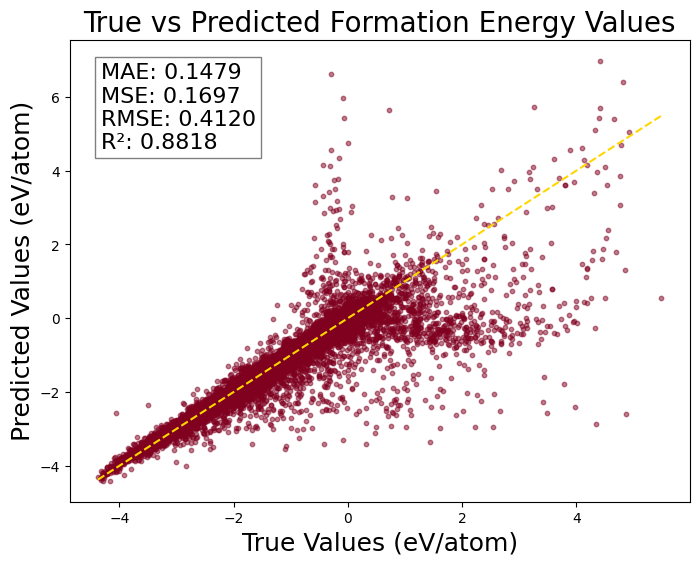

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = df['True Values SG']
y_pred = df['Predicted Values SG']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Plot true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='#800020', alpha=0.5, s=10)  # Burgundy dots
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='#FFD700', linestyle='--')  # y = x line in gold

# Set title and labels with specified font sizes
plt.title('True vs Predicted Formation Energy Values', fontsize=20)  # Title font size
plt.xlabel('True Values (eV/atom)', fontsize=18)  # X label font size
plt.ylabel('Predicted Values (eV/atom)', fontsize=18)  # Y label font size

# Create a box for metrics in the upper-left corner
metrics_text = f'MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}'
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.grid(False)
plt.savefig("pred_v_true_f_e.eps", format='eps')

# Display the plot
plt.show()
